## Imports

In [30]:
import string
letters = list(string.ascii_lowercase)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Ler dados

In [31]:
df = pd.read_csv("../data/Student_performance_processed.csv")
df.shape

(2392, 15)

In [32]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,Some college,19.833723,7,Y,Moderate,N,N,Y,N,2.929196,C
1,1002,18,0,0,High School,15.408756,0,N,Low,N,N,N,N,3.042915,B
2,1003,15,0,2,Bachelor's,4.210570,26,N,Moderate,N,N,N,N,0.112602,E
3,1004,17,1,0,Bachelor's,10.028829,14,N,High,Y,N,N,N,2.054218,D
4,1005,17,1,0,Some college,4.672495,17,Y,High,N,N,N,N,1.288061,E


### Remover colunas

In [33]:
df.drop(["StudentID", "Gender", "Ethnicity"], axis=1, inplace=True)

In [34]:
df.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Some college,19.833723,7,Y,Moderate,N,N,Y,N,2.929196,C
1,18,High School,15.408756,0,N,Low,N,N,N,N,3.042915,B
2,15,Bachelor's,4.210570,26,N,Moderate,N,N,N,N,0.112602,E
3,17,Bachelor's,10.028829,14,N,High,Y,N,N,N,2.054218,D
4,17,Some college,4.672495,17,Y,High,N,N,N,N,1.288061,E


In [35]:
TARGET = "GradeClass"

### Corrige tipo

Os tipos estão corretos!

In [36]:
df.dtypes

Age                    int64
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport       object
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass            object
dtype: object

## Categorização

In [41]:
def create_labels(bins):

    labels = []
    
    for i in range(len(bins)-1):
        label = f"{letters[i]}_({round(bins[i], 2)}_{round(bins[i+1], 2)}]"
        labels.append(label)
    
    return labels

def categorize_column(data, column, q=5):
    
    _, bins = pd.qcut(data[column], q=q, retbins=True)
    bins[0] = -np.inf
    bins[-1] = np.inf

    labels = create_labels(bins)

    data[f"{column}_cat"] = pd.cut(data[column], bins=bins, labels=labels)
    data[f"{column}_cat"] = data[f"{column}_cat"].astype(str)

    return data

In [45]:
numeric_cols = list(df.select_dtypes(include='number').columns)
numeric_cols.remove('Age')

In [46]:
for col in numeric_cols:
    categorize_column(df, col)

In [47]:
df.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,StudyTimeWeekly_cat,Absences_cat,GPA_cat
0,17,Some college,19.833723,7,Y,Moderate,N,N,Y,N,2.929196,C,e_(15.61_inf],b_(6.0_12.0],e_(2.77_inf]
1,18,High School,15.408756,0,N,Low,N,N,N,N,3.042915,B,d_(11.48_15.61],a_(-inf_6.0],e_(2.77_inf]
2,15,Bachelor's,4.210570,26,N,Moderate,N,N,N,N,0.112602,E,b_(3.99_7.94],e_(23.0_inf],a_(-inf_1.01]
3,17,Bachelor's,10.028829,14,N,High,Y,N,N,N,2.054218,D,c_(7.94_11.48],c_(12.0_18.0],c_(1.61_2.2]
4,17,Some college,4.672495,17,Y,High,N,N,N,N,1.288061,E,b_(3.99_7.94],c_(12.0_18.0],b_(1.01_1.61]


## Univariada

### Volume

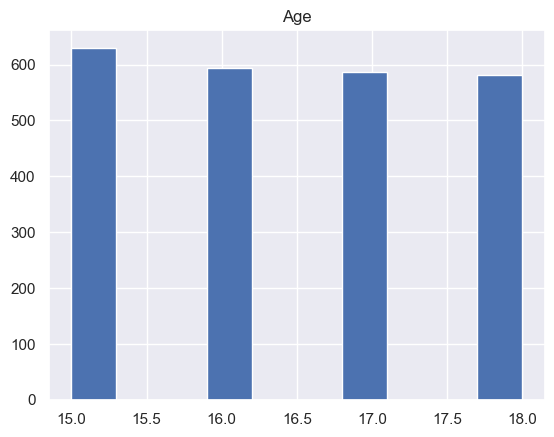

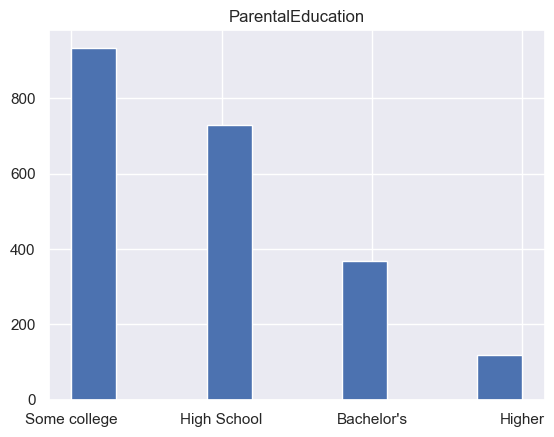

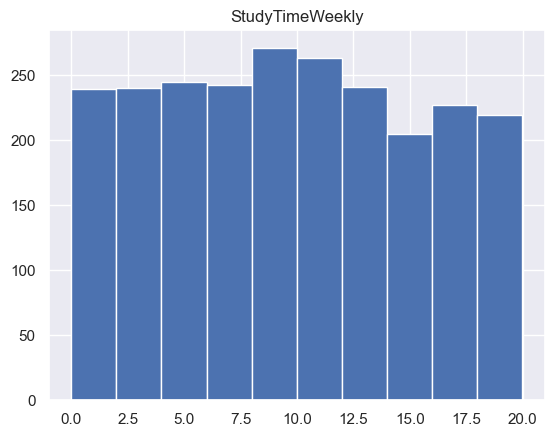

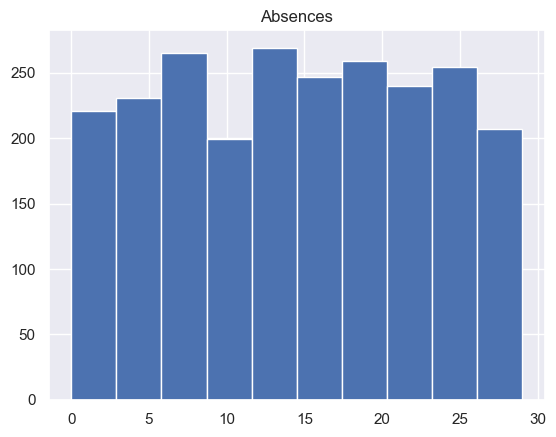

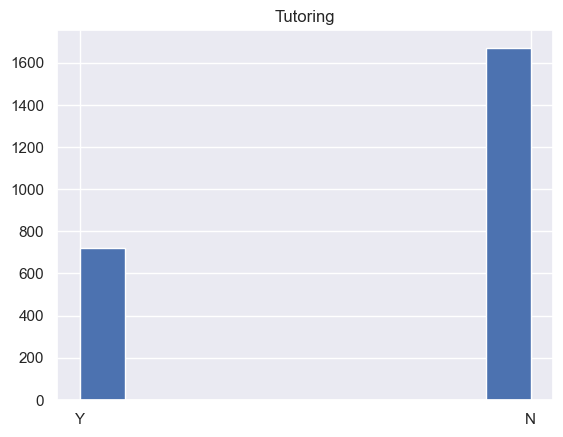

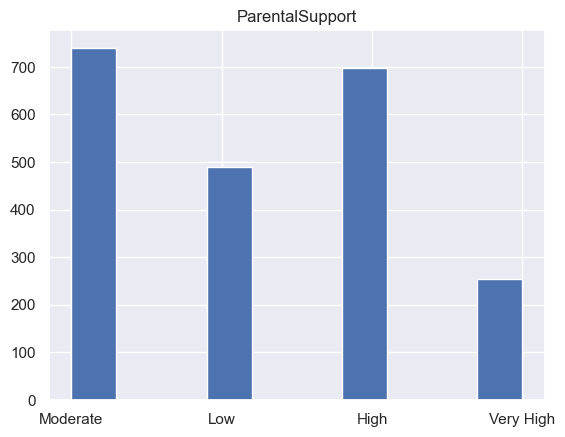

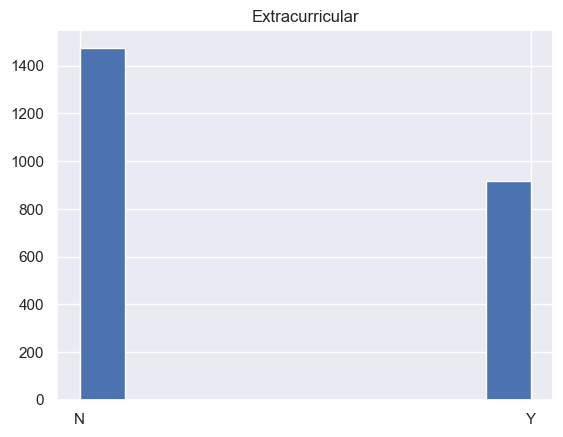

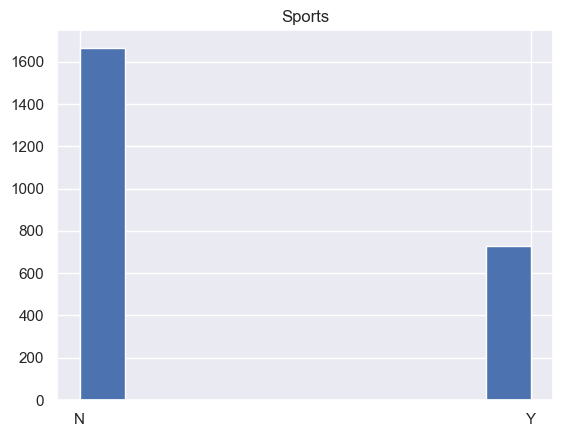

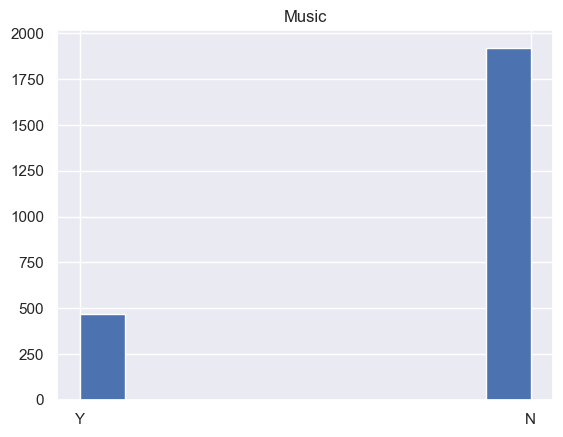

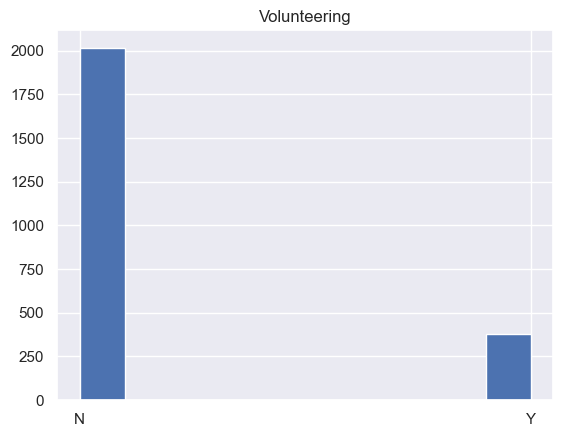

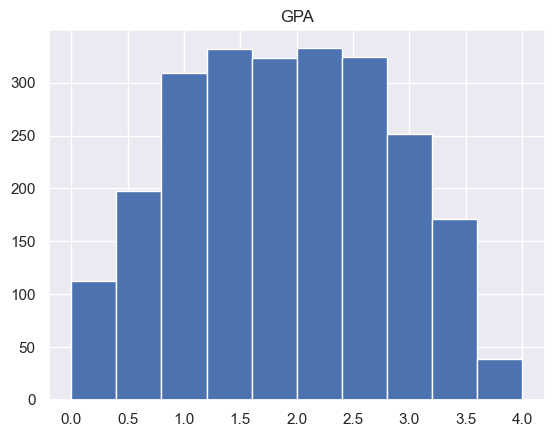

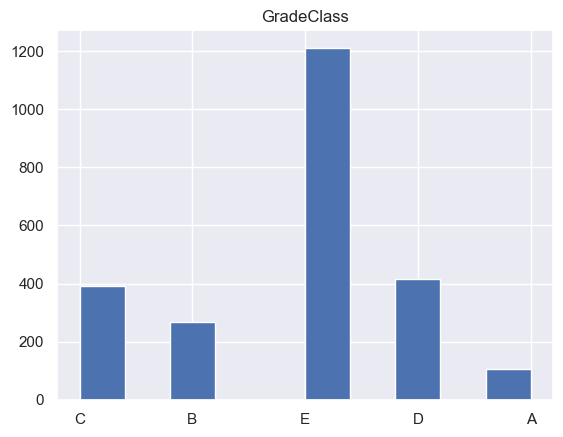

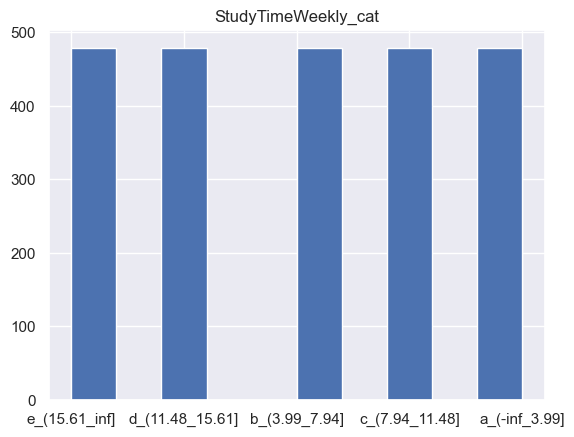

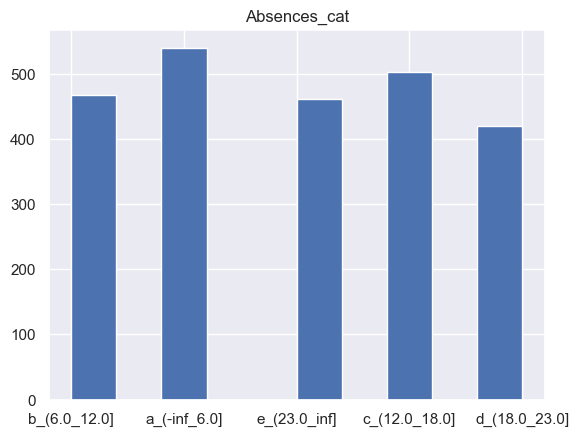

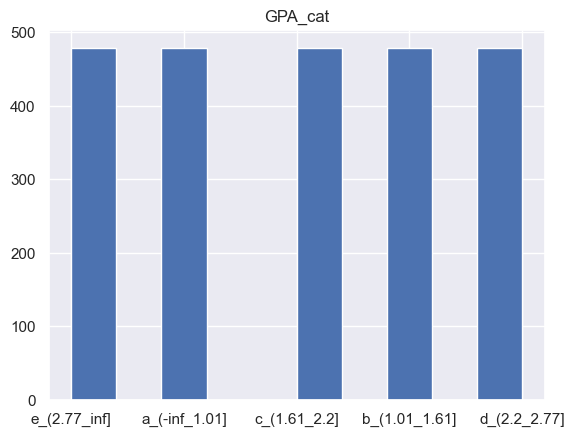

In [51]:
for col in df.columns:
    plt.clf()
    df[col].hist()
    plt.title(col)
    plt.show()

### Colunas numéricas

In [50]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['Age', 'StudyTimeWeekly', 'Absences', 'GPA'], dtype='object')

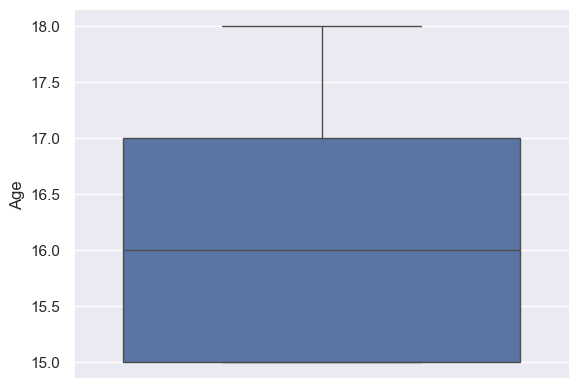

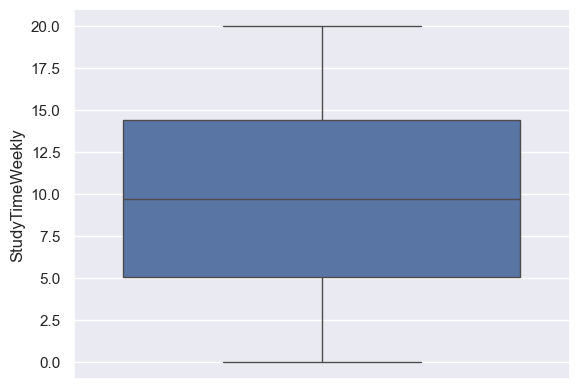

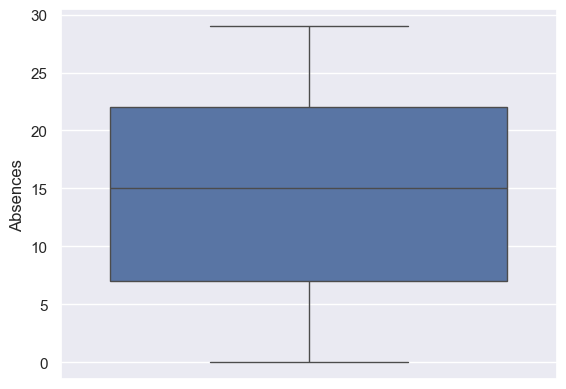

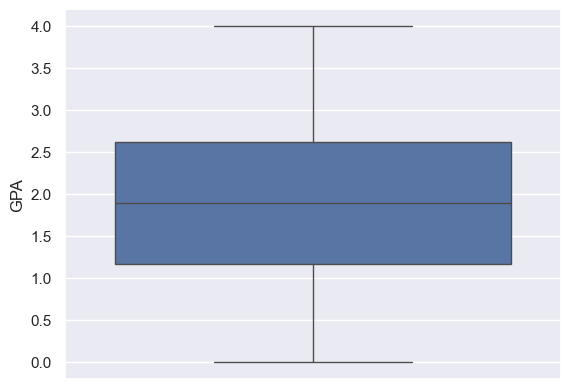

In [52]:
for col in numeric_cols:
    plt.clf()
    sns.boxplot(df[col])
    plt.show()

### Colunas categóricas

In [53]:
categoric_cols = list(df.select_dtypes(exclude='number').columns)

for col in [x for x in df.columns if "_cat" in x]:
    categoric_cols.remove(col)


categoric_cols

['ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GradeClass']

## Bivariada

### Correlação

<Axes: >

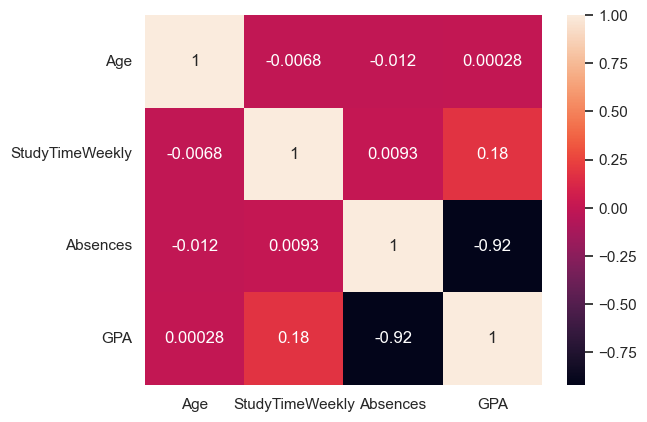

In [54]:
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True)

### Colunas numéricas

In [57]:
cols_ncat = [x for x in df.columns if "_cat" in x]
cols_ncat

['StudyTimeWeekly_cat', 'Absences_cat', 'GPA_cat']

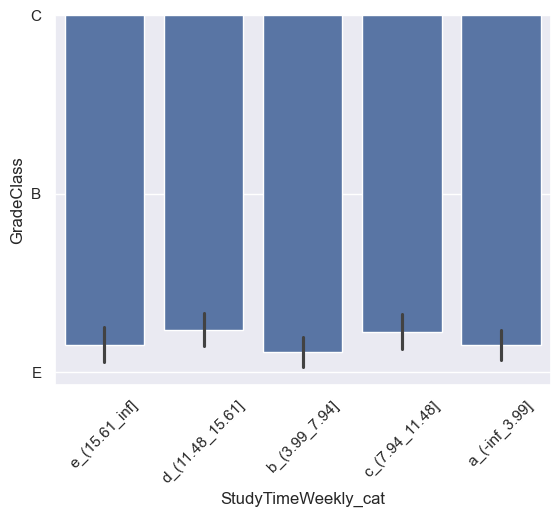

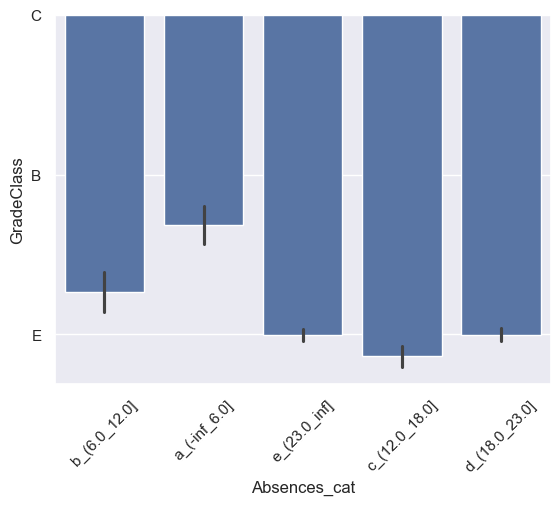

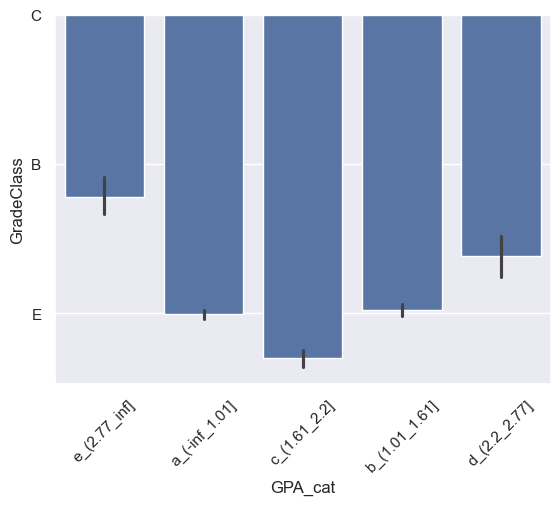

In [58]:
for col in cols_ncat:
    plt.clf()
    sns.barplot(df, x=col, y=TARGET)
    plt.xticks(rotation=45)
    plt.show()